In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [38]:
dfS = sklearn.datasets.fetch_california_housing()

In [39]:
#Loading dataset to pandas Df

df = pd.DataFrame(dfS.data, columns= dfS.feature_names)

In [40]:
#add target column to df
df['Price'] = dfS.target

In [41]:
df.isnull().sum()
df.dropna(inplace=True)

In [42]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation betweem various features in dataset

In [43]:
cor = df.corr()

<Axes: >

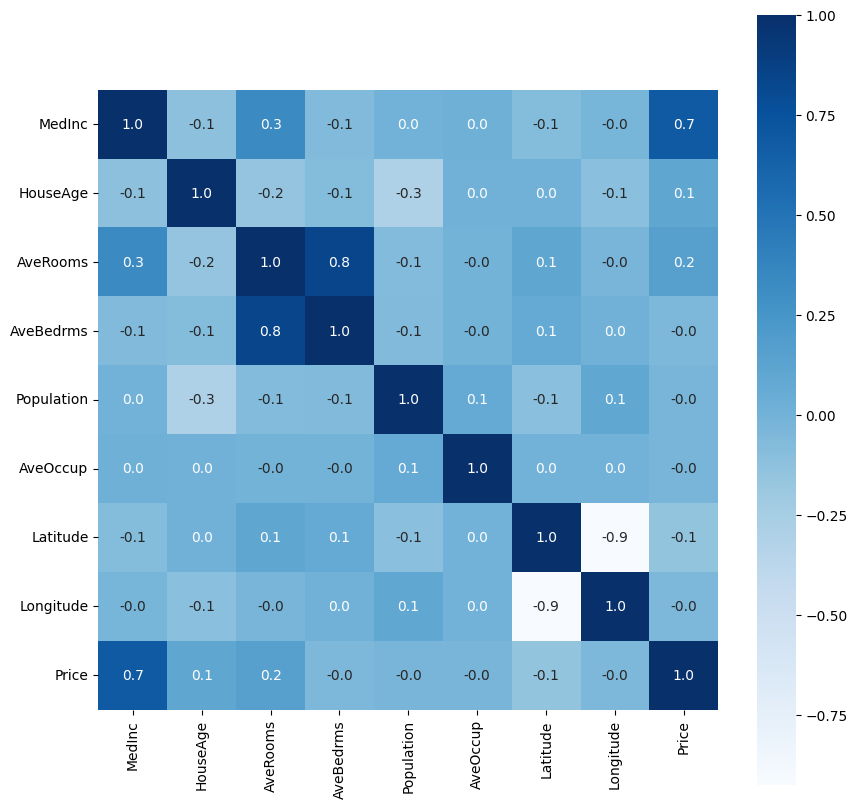

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [45]:
X = df.drop(columns='Price', axis=1)
Y = df['Price']

In [46]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
model = XGBRegressor()
model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**EVALUATION**

In [57]:
YtrainPred = model.predict(Xtrain)
YtestPred = model.predict(Xtest)
print(YtrainPred)


[1.2811276 3.5806673 1.795477  ... 2.308142  2.5287933 3.645046 ]


In [56]:
#error for training data
mae = metrics.mean_absolute_error(Ytrain, YtrainPred)
r2 = metrics.r2_score(Ytrain, YtrainPred)

print(f"R2 for train data is: {r2}")
print(f"MAE for train data is: {mae}")

R2 for train data is: 0.9445725845802867
MAE for train data is: 0.19257627556572793


In [58]:
#error for testing data
mae = metrics.mean_absolute_error(Ytest, YtestPred)
r2 = metrics.r2_score(Ytest, YtestPred)

print(f"R2 for train data is: {r2}")
print(f"MAE for train data is: {mae}")

R2 for train data is: 0.8301370561019205
MAE for train data is: 0.30957335413783094


**Plotting Graphs**

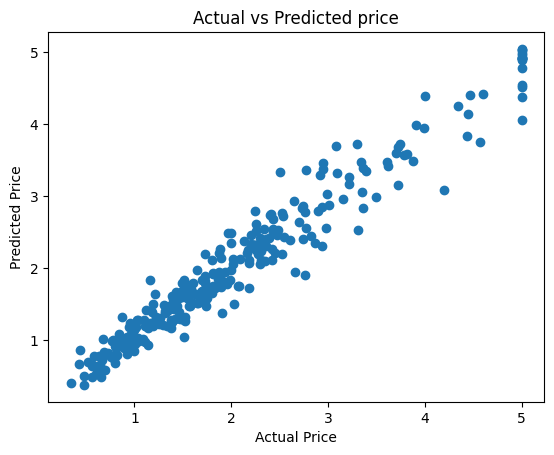

In [65]:
plt.scatter(Ytrain[:300], YtrainPred[:300]) #just limitting num of points on graph
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price')
plt.show()

In [66]:
import pickle

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the file
with open('house_price_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction using the loaded model
loaded_prediction = loaded_model.predict(Xtest)

# Print first 5 predictions to confirm
print("Predictions from loaded model:", loaded_prediction[:5])


Predictions from loaded model: [0.5944522 0.7841187 5.1981163 2.439808  2.4274323]
